In [1]:
import sys
sys.path.append('./scripts/')
from datasets import *
import scipy.ndimage
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

dataset='ilsvrc12fine'
paths, count, y, idx_to_labels = get_dataset(dataset)

print(count, len(paths))

1281167 1281167


In [15]:
idxs= np.arange(0, 1281167, 10)

In [4]:
import numpy as np

data = np.load('./outputs/ilsvrc12fine/Mixed_7b.cat_2/conv_maps.npy', mmap_mode= 'r')

In [2]:
#model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet50', pretrained=True)
model = torch.hub.load('pytorch/vision:v0.9.0', 'inception_v3', pretrained=True)
model.eval()

Using cache found in /home/mara/.cache/torch/hub/pytorch_vision_v0.9.0


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [3]:
 torchvision.models.feature_extraction.get_graph_node_names(model)

/home/mara/torchenv/lib/python3.6/site-packages/torchvision/models/feature_extraction.py:170: UserWarning: NOTE: The nodes obtained by tracing the model in eval mode are a subsequence of those obtained in train mode. When choosing nodes for feature extraction, you may need to specify output nodes for train and eval mode separately.
  warnings.warn(msg + suggestion_msg)


(['x',
  'getitem',
  'unsqueeze',
  'mul',
  'add',
  'getitem_1',
  'unsqueeze_1',
  'mul_1',
  'add_1',
  'getitem_2',
  'unsqueeze_2',
  'mul_2',
  'add_2',
  'cat',
  'Conv2d_1a_3x3.conv',
  'Conv2d_1a_3x3.bn',
  'Conv2d_1a_3x3.relu',
  'Conv2d_2a_3x3.conv',
  'Conv2d_2a_3x3.bn',
  'Conv2d_2a_3x3.relu',
  'Conv2d_2b_3x3.conv',
  'Conv2d_2b_3x3.bn',
  'Conv2d_2b_3x3.relu',
  'maxpool1',
  'Conv2d_3b_1x1.conv',
  'Conv2d_3b_1x1.bn',
  'Conv2d_3b_1x1.relu',
  'Conv2d_4a_3x3.conv',
  'Conv2d_4a_3x3.bn',
  'Conv2d_4a_3x3.relu',
  'maxpool2',
  'Mixed_5b.branch1x1.conv',
  'Mixed_5b.branch1x1.bn',
  'Mixed_5b.branch1x1.relu',
  'Mixed_5b.branch5x5_1.conv',
  'Mixed_5b.branch5x5_1.bn',
  'Mixed_5b.branch5x5_1.relu',
  'Mixed_5b.branch5x5_2.conv',
  'Mixed_5b.branch5x5_2.bn',
  'Mixed_5b.branch5x5_2.relu',
  'Mixed_5b.branch3x3dbl_1.conv',
  'Mixed_5b.branch3x3dbl_1.bn',
  'Mixed_5b.branch3x3dbl_1.relu',
  'Mixed_5b.branch3x3dbl_2.conv',
  'Mixed_5b.branch3x3dbl_2.bn',
  'Mixed_5b.branch3

In [4]:
#layer='layer4.0.add'
layer='Mixed_7b.cat_2'
SAVEFOLD=f'outputs/{dataset}'
if not os.path.exists(SAVEFOLD):
    os.mkdir(SAVEFOLD)

In [5]:
try:
    os.mkdir(f"{SAVEFOLD}/{layer}/")
except:
    print("Maybe the directory already exists? ")
SAVEFOLD=f"{SAVEFOLD}/{layer}/"

Maybe the directory already exists? 


In [22]:
classes = np.unique(y[idxs])

In [13]:
len(y)

1281167

In [8]:
SAVEFOLD='outputs/ilsvrc12fine/Mixed_7b.cat_2/'
if not os.path.exists(SAVEFOLD):
    os.mkdir(SAVEFOLD)

In [9]:
print(layer)
return_nodes={f'{layer}': 'conv', 'avgpool':'avgpool', 'fc':'fc'
             }
model = torchvision.models.feature_extraction.create_feature_extractor(model, return_nodes=return_nodes)

Mixed_7b.cat_2


In [10]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
inputs=torch.zeros((8,3,299,299), dtype=torch.float).to(device)
model.to(device)
outs=model(inputs)
dim_c = outs['conv'].shape[1]
dim_w = outs['conv'].shape[2]
dim_h = outs['conv'].shape[3]

In [11]:
print(dim_c, dim_w, dim_h)

2048 8 8


In [12]:
import cdisco.cdisco
import imp
imp.reload(cdisco.cdisco)

<module 'cdisco.cdisco' from './scripts/cdisco/cdisco.py'>

In [26]:
ppaths=[paths[i] for i in idxs]
cdisco.cdisco.get_model_state(model, ppaths, y[idxs], dim_c, dim_w, dim_h, SAVEFOLD=SAVEFOLD)


embeddings shape: (128117, 2048)
gradients shape: (128117, 2048)
predictions shape: (128117, 1000)
gradients shape (128117, 2048), conv_embs shape (128117, 2048), conv_maps.shape (128117, 2048, 8, 8)


In [52]:
#SAVEFOLD='outputs/ilsvrc12/Conv2d_1a_3x3.conv/'

In [16]:
"""
LOAD precomputed results
"""

gradients_wrt_conv_layer=np.load(f"{SAVEFOLD}/gradients_wrt_conv_layer.npy")
predictions=np.load(f"{SAVEFOLD}/predictions.npy")
conv_maps=np.load(f"{SAVEFOLD}/conv_maps.npy")

# ## only if CDISCO was already run once
# class_concept_candidates=np.load(f"{SAVEFOLD}/cdisco_candidates.npy", allow_pickle=True).item()
# pvh=np.load(f"{SAVEFOLD}/eigenvectors.npy",allow_pickle=True)

In [54]:
SAVEFOLD

'outputs/ilsvrc12fine/Mixed_7c.cat_2_dogs/'

In [55]:
""" 
RUN CDISCO
"""
class_concept_candidates, pvh = cdisco.cdisco.cdisco(conv_maps, gradients_wrt_conv_layer, predictions, classes)

np.save(f"{SAVEFOLD}/cdisco_candidates.npy", class_concept_candidates)
np.save(f"{SAVEFOLD}/eigenvectors.npy", pvh)

In [18]:
class_concept_candidates = np.load(f"{SAVEFOLD}/cdisco_candidates.npy", allow_pickle=True).item()
pvh=np.load(f"{SAVEFOLD}/eigenvectors.npy")
concepts, candidates=cdisco.cdisco.cdisco_concepts_list(class_concept_candidates,classes,limit=1)

In [19]:
len(candidates)

10

In [58]:
pvh.shape

(2048, 2048)

In [20]:
candidates

{2016: [155.0],
 962: [159.0],
 1733: [207.0],
 1447: [258.0],
 204: [193.0],
 1682: [162.0],
 404: [167.0],
 982: [182.0],
 1974: [229.0],
 1915: [273.0]}

In [ ]:
import cdisco.analyze
imp.reload(cdisco.analyze)
cdisco.analyze.cdisco_pop_concepts(class_concept_candidates, classes, pvh, savefold=SAVEFOLD)   

In [ ]:
pvh.shape

In [ ]:
len(concepts)

In [ ]:
import cdisco.analyze
imp.reload(cdisco.analyze)
import cdisco.analyze
#
cdisco.analyze.cdisco_angle_dissection(pvh, candidates, savefold=SAVEFOLD)

In [ ]:
idx_to_labels

In [ ]:
conc=class_concept_candidates[971][0]
print(conc)
cdisco.analyze.cdisco_alignment(conc, class_concept_candidates, idx_to_labels)

In [25]:
class_concept_candidates[258][0], class_concept_candidates[258][1], class_concept_candidates[258][2]


(608, 620, 292)

In [28]:
class_concept_candidates[229][0], class_concept_candidates[229][1], class_concept_candidates[229][2]

(1362, 2030, 553)

In [22]:
import sys
sys.path.append('./scripts/')
import cdisco.vis
import imp
imp.reload(cdisco.vis)
def relu(data):
    return data * (data>0)

In [23]:
y[idxs]

array([[155.],
       [155.],
       [155.],
       ...,
       [273.],
       [273.],
       [273.]])

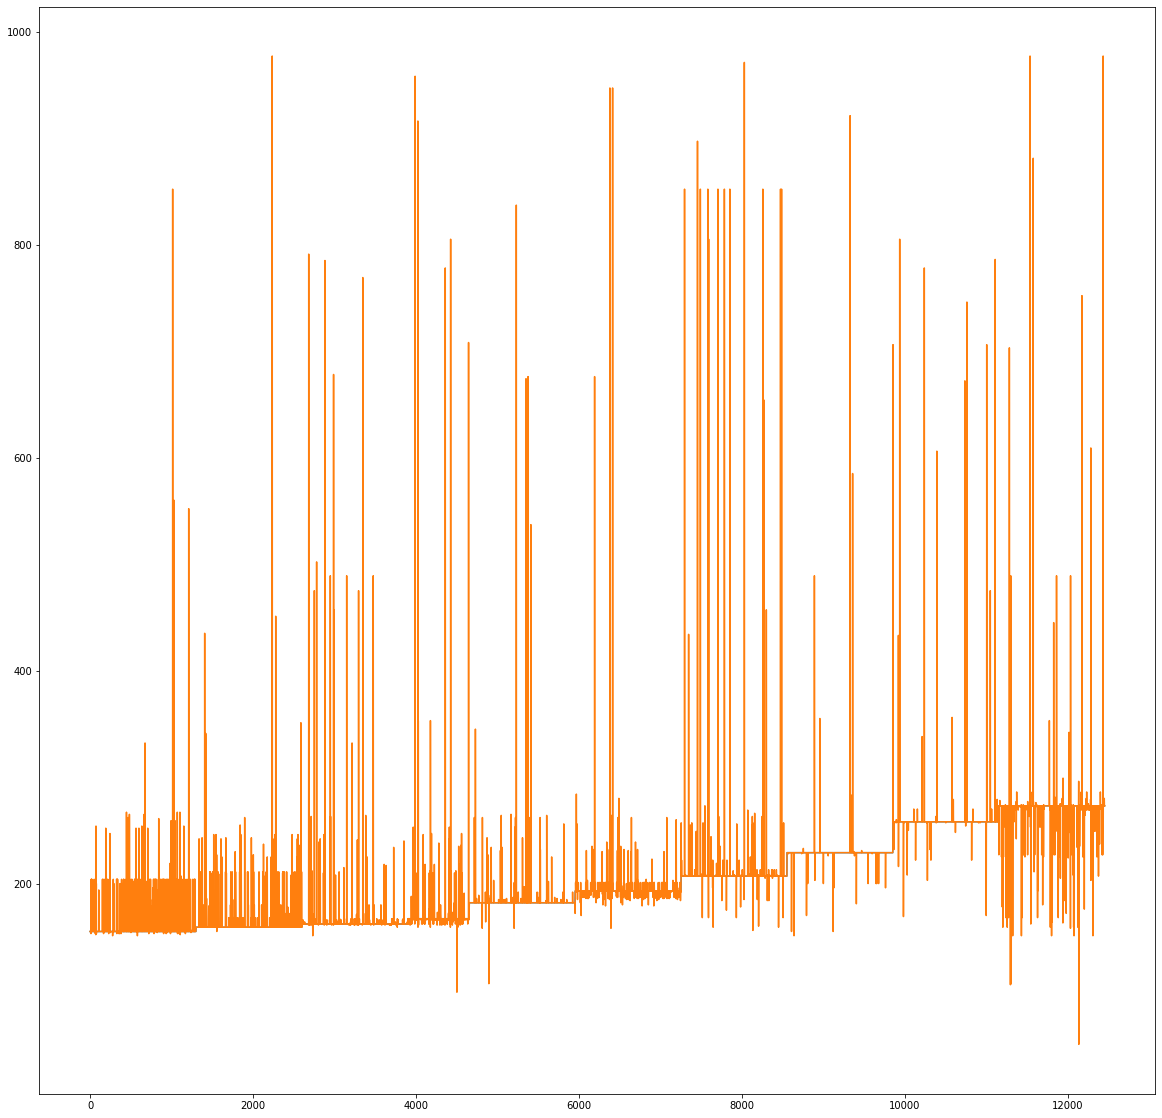

In [24]:
plt.plot(y[idxs])
plt.plot([np.argmax(predictions[iterator]) for iterator in range(len(predictions))])

In [25]:
preds=[np.argmax(predictions[iterator]) for iterator in range(len(predictions))]

In [26]:
np.argwhere(preds!=y[idxs])

array([[    0,    11],
       [    0,    15],
       [    0,    17],
       ...,
       [12453, 12435],
       [12453, 12436],
       [12453, 12449]])

In [27]:
ys=y[idxs].ravel()

In [28]:
preds[526],ys[526]

(155, 155.0)

{207}


/home/mara/torchenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


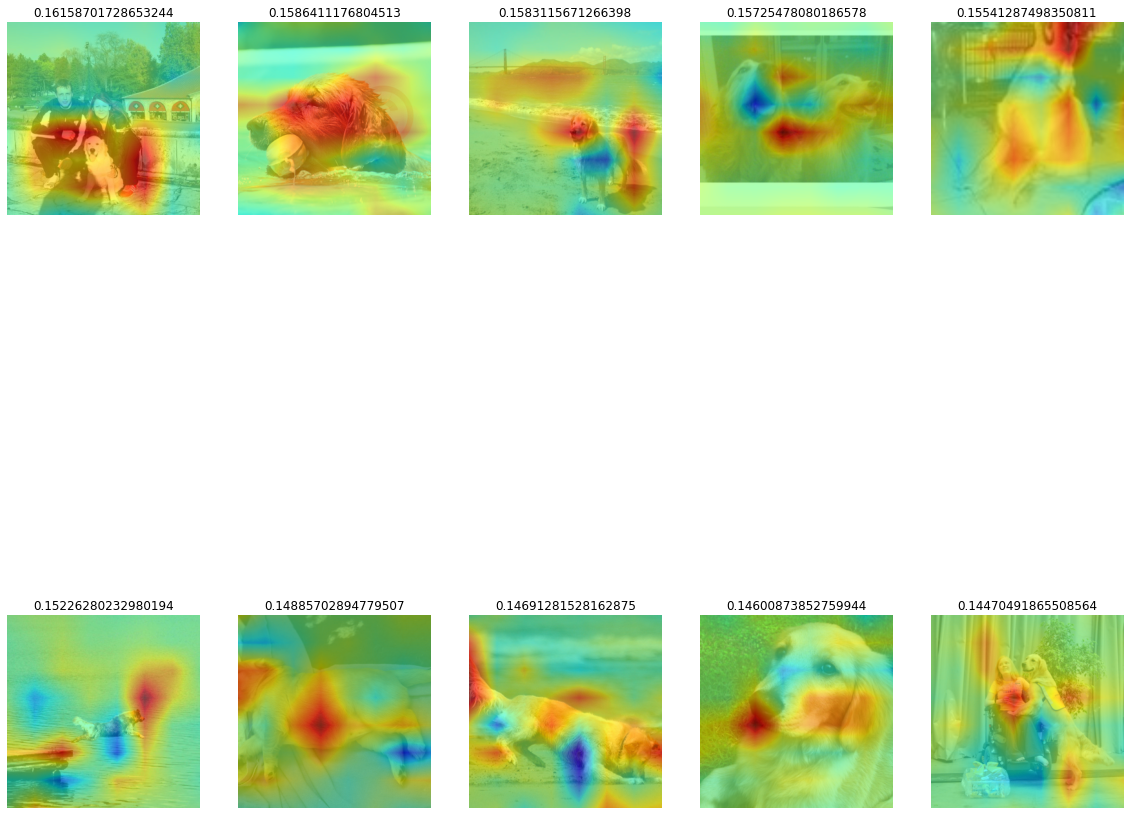

In [45]:
plt.rcParams['figure.figsize']=(20,20)
conv_embeddings=np.mean(conv_maps, axis=(2,3))
for c in [207]:#, 159, 162, 167, 182, 193, 207, 229, 258, 273]:

    concept=class_concept_candidates[c][0]
    classes_with_concept = {c} #candidates[c][:]
    print(classes_with_concept)
    c=concept
    p_data= np.dot(conv_embeddings, pvh[c,:].T)
    sorted_prj_indexes=np.argsort((p_data))[::-1]
    concept_vector = pvh[c,:]  
    

    image_idxs=[]
    
    #classes_with_concept = set(candidates[c])

    iterator=sorted_prj_indexes[0]
    i=1
    while len(image_idxs)<10 and i<=len(sorted_prj_indexes):
        if(np.argmax(predictions[iterator]) in classes_with_concept):
            #print("yes")
            image_idxs.append(iterator)
        iterator=sorted_prj_indexes[i]
        i+=1
    i=1

    images = image_idxs[:10]
    for img_id in images[:10]:
        plt.subplot(2,len(images)/2,i)
        #img_id=img_id[0]
        #print(c, img_id)
        fmap=cdisco.vis.cdisco_concept_vis(img_id, concept_vector, dim_c, dim_w, dim_h, conv_maps)

        plt.imshow((transform(Image.open(ppaths[img_id]))).swapaxes(0,1).swapaxes(1,-1))#,alpha=0.5)
        hmap=scipy.ndimage.zoom(fmap, 299/fmap.shape[0],order=1)
        plt.imshow(hmap, cmap='jet', alpha=0.6, vmin=-np.abs(hmap).max(), vmax=np.abs(hmap).max())
        plt.title(p_data[sorted_prj_indexes[i]])
        plt.axis("off")
        i+=1

    plt.savefig(f"{SAVEFOLD}_concept_map_{c}_aligned.png")

In [36]:
idx_to_labels

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [ ]:
len(image_idxs)

In [ ]:
for i in range(len(ys)):
    if ( (ys[i]==768) and preds[i]==805):
        print(i)

In [ ]:
i=998
ys[i], preds[i]

In [ ]:
import imp
imp.reload(cdisco.vis)

In [ ]:
#rugby
cdisco.vis.cdisco_vis_overlay_fmaps(583, conv_maps, ppaths, savefold=SAVEFOLD, 
                                    concept_vector=pvh[583,:], start_from=i)

In [ ]:
#soccer
cdisco.vis.cdisco_vis_overlay_fmaps(1860, conv_maps, ppaths, savefold=SAVEFOLD, 
                                    concept_vector=pvh[1860,:], start_from=i)

In [ ]:
# note : to obtain gradcam just pass the GAP relued gradients as concept vector. 
cdisco.vis.cdisco_vis_overlay_fmaps(1860, conv_maps, paths, 
                                    savefold=SAVEFOLD, 
                                    concept_vector=np.mean(relu(gradients_wrt_conv_layer[63]), axis=(1,2)), 
                                    start_from=63)

In [ ]:
idx_to_labels


In [24]:
class_concept_candidates[768][0], class_concept_candidates[768][1], class_concept_candidates[768][2]

KeyError: 768

In [ ]:
import cdisco.vis
plt.rcParams['figure.figsize']=(10,10)

#c
first_candidates_only=candidates
#del c
for class_ in [805]:#340, 734, 404, 396, 971, 258, 879, 768, 805]:
    print(class_)
    conc= class_concept_candidates[class_][0]
    #cdisco.analyze.cdisco_alignment(conc, class_concept_candidates, idx_to_labels)

    concept_vector = pvh[conc,:]  # this is the eigenvector = the concept that we want to visualize
    for classes_with_concept in [class_]:#first_candidates_only[conc]:
        #classes_with_concept = first_candidates_only[c][0] # taking always the first class, for now
        image_idxs= np.argwhere(classes_with_concept==np.argmax(predictions,axis=1))
        i=1
        try:
            os.mkdir(f"{SAVEFOLD}/concept_segmentations_{conc}")
        except: 
            "Folder exists."
        SAVE_CONCEPTS_FOLD=f"{SAVEFOLD}/concept_segmentations_{conc}/"
        csv=open(f"{SAVE_CONCEPTS_FOLD}_rank.csv",'w')

        images = image_idxs[0::100]
        for img_id in images:
            #plt.subplot(1,len(images),i)
            img_id=img_id[0]
            print(conc, img_id)
            fmap=cdisco.vis.cdisco_concept_vis(img_id, concept_vector, dim_c, dim_w, dim_h, conv_maps)
            upsampled_fmap=scipy.ndimage.zoom(fmap, 299/fmap.shape[0],order=1)
            xm,ym=np.where(upsampled_fmap== upsampled_fmap.max())
            xm=xm[0]; ym=ym[0]
            image=transform(Image.open(ppaths[img_id])).swapaxes(0,1).swapaxes(1,-1)

            th = np.percentile(upsampled_fmap,85) 
            mask=np.zeros((299,299,3))
            bmask=(upsampled_fmap>th)*1
            mask[:,:,0]=mask[:,:,1]=mask[:,:,2]=bmask
            image=transform(Image.open(ppaths[img_id])).swapaxes(0,1).swapaxes(1,-1)
            th_image=mask*image.cpu().numpy()
            th_image[np.where(th_image==0)]+=255.
            #plt.imshow(th_image)

            #patch=image[max(0,xm-20):min(299,xm+20),max(ym-20,0):min(ym+20,299)]
            plt.imshow(th_image)
            plt.title(np.argmax(predictions[img_id]))
            plt.axis('off')
            #import pdb; pdb.set_trace()
            #plt.imshow((transform(Image.open(paths[img_id]))).swapaxes(0,1).swapaxes(1,-1))#,alpha=0.5)
            #plt.imshow(scipy.ndimage.zoom(fmap, 299/8,order=1), cmap='jet', alpha=0.3)

            i+=1
            plt.savefig(f"{SAVE_CONCEPTS_FOLD}concept_seg_{conc}_class_{classes_with_concept}_{img_id}.png")
            plt.figure()
            plt.imshow(image)
            plt.axis('off')
            plt.savefig(f"{SAVE_CONCEPTS_FOLD}concept_seg_orig_image_{conc}_class_{classes_with_concept}_{img_id}.png")
    #csv.close()  
        

In [ ]:
class_concept_candidates[805][0], class_concept_candidates[805][1], class_concept_candidates[805][2]

In [ ]:
image_idxs

In [ ]:
f"{SAVE_CONCEPTS_FOLD}concept_seg_{conc}_class_{classes_with_concept}_{img_id}.png"

In [ ]:
import cdisco.vis
imp.reload(cdisco.vis)
conv_embeddings=np.mean(conv_maps, axis=(2,3))
cdisco.vis.cdisco_vis_extremes_extensive(conc, candidates, pvh, conv_embeddings, conv_maps, paths, predictions, idx_to_labels, savefold=SAVEFOLD)

In [ ]:
import cdisco.analyze
imp.reload(cdisco.analyze)
angles, max_idx = cdisco.analyze.cdisco_direction_alignment(pvh, conc)

In [ ]:
max_idx, angles[max_idx]

In [ ]:
np.argsort(angles)

In [ ]:
plt.plot([angles[i] for i in idxs])

In [ ]:
idxs=np.argsort(np.abs(angles))

In [ ]:
idx_to_labels

In [ ]:
imp.reload(cdisco.analyze)
import cdisco.analyze
conc=class_concept_candidates[229][0]
cdisco.analyze.cdisco_alignment(conc, class_concept_candidates, idx_to_labels)

In [ ]:
conc